# 鸢尾花分类 -- scikit learn

鸢尾花数据集中包含有150个鸢尾花数据，每条数据包括四个特征和一个输出结果。

其中，四个特征包括：<br>
sepal length (cm): 萼片长度-厘米 <br>
sepal width --cm: 萼片宽度-厘米 <br>
petal length --cm: 花瓣长度-厘米 <br>
petal width --cm: 花瓣宽度-厘米

输出结果是鸢尾花的具体品种：species，包括：Iris-setosa、Iris-versicolor、Iris-virginica三种类型。


首先导包

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'SimHei'


## 加载数据


In [3]:
iris = pd.read_csv("../assets/iris.csv")

# 通过head函数可以查看是否成功加载数据
iris.head(3)  # 该函数默认打印前五条数据。如果在参数列表中添加一个整型数，则打印开头的指定几条数据。


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


统计数据信息

info()函数用于统计数据内容，包括数据类型、是否有空值等信息。


In [4]:
iris.info()  # 打印数据信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


在上面的信息中，第0列是ID信息，这一列信息是不需要使用的，所以可以将其从数据集中删除。

该功能通过pandas.DataFrame.drop实现。

在参数列表中，第一个参数表示要删除"Id"信息，第二个参数axis表示要删除的是一整列信息，inplace参数表示删除数据是在当前的数据上删除。

如果inplace值为False，就是将信息复制出来一份。


In [6]:
iris.drop("Id", axis=1, inplace=True)

iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### iris数据探查

pandas.DataFrame.plot.scatter

下面的ax参数用来指定在哪个画板上画图，ax=fig表示还是使用第一个fig画板画图。

python.matplotlib.pyplot.gca()函数的作用

matplotlib.pyplot.gcf() -- get current figure

matplotlib画图中fig、ax、plt的区别和联系

matplotlib.figure.Figure -- fig的所有操作。


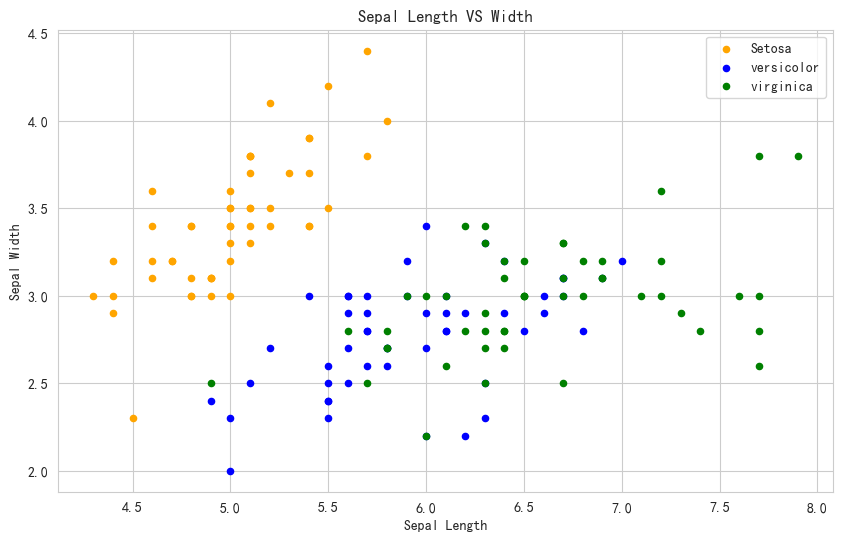

In [7]:
fig = (iris[iris.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange',
                                                label='Setosa'))
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue',
                                             label='versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green',
                                            label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")  # 设置x标签
fig.set_ylabel("Sepal Width")  # 设置y标签
fig.set_title("Sepal Length VS Width")  # 设置标题
fig = plt.gcf()  # 获取最近的图像
fig.set_size_inches(10, 6)  # 设置尺寸
plt.show()  # 显示图片


上面的散点图展示了花萼的长度、宽度与鸢尾花品种的分类之间的关系，其中，Setosa比较容易区分，但是versicolor和virginica的重合度比较高，识别起来相对困难。

下面的代码从花盘的角度绘制了数据集的散点图。


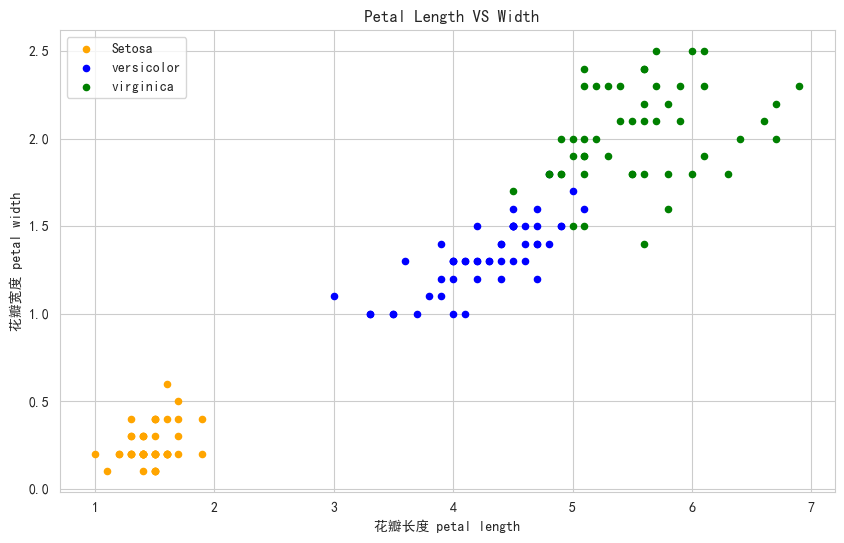

In [8]:
fig = iris[iris.Species == 'Iris-setosa'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='orange',
                                                       label='Setosa')
iris[iris.Species == 'Iris-versicolor'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='blue',
                                                     label='versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot.scatter(x='PetalLengthCm', y='PetalWidthCm', color='green',
                                                    label='virginica', ax=fig)
fig.set_xlabel("花瓣长度 petal length")  # petal length
fig.set_ylabel("花瓣宽度 petal width")  # petal width
fig.set_title(" Petal Length VS Width")
fig = plt.gcf()
fig.set_size_inches(10, 6)
plt.show()


从散点图可以看出来，从花瓣的特征上，可以更容易的区分鸢尾花的种类。

下面的代码绘制柱状图以计算各种特征在树枝上的分布情况。


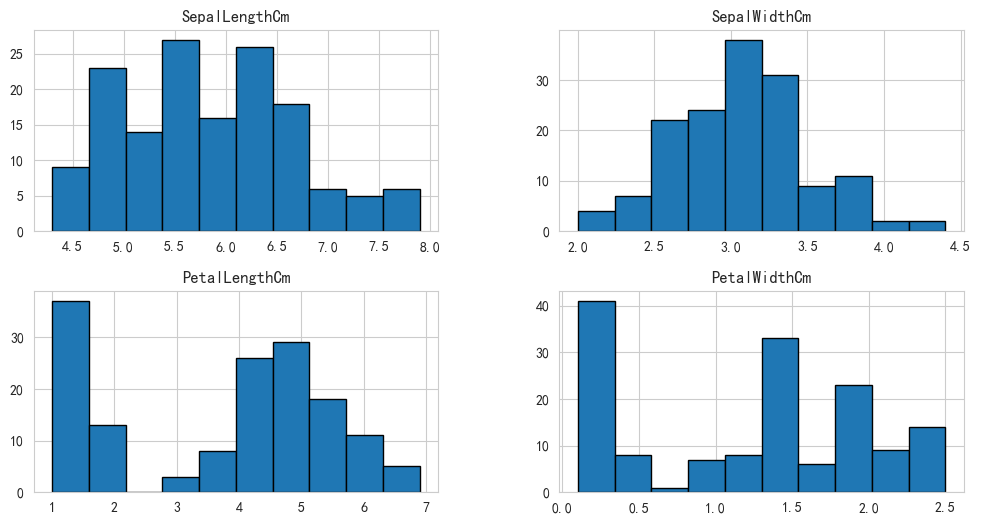

In [9]:
iris.hist(edgecolor='black', linewidth=1)
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.show()


下面的代码绘制小提琴图表示了数据密度大小。

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

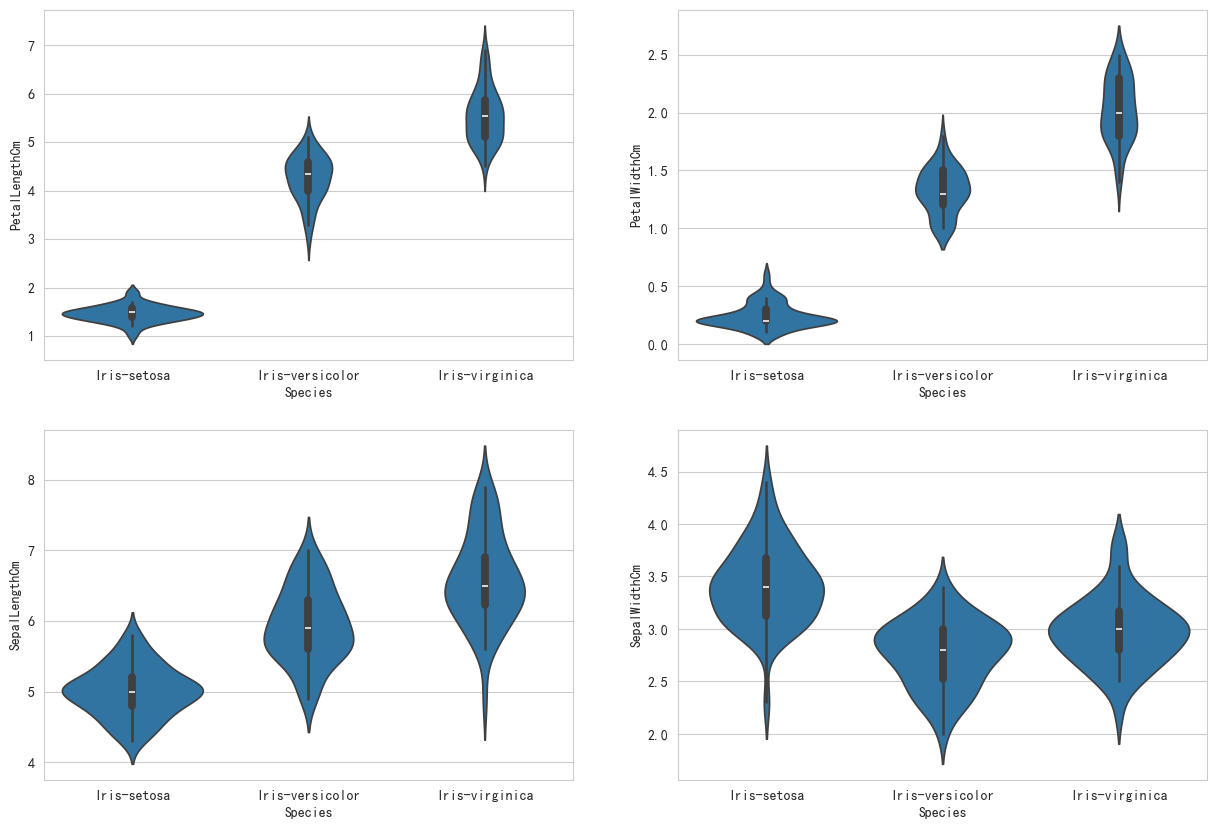

In [10]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

## 解决问题

鸢尾花分类是一个分类问题，所以使用分类算法建立模型。<br>


---

- 分类：样本属于一个或者多个类别，从已经分类好的数据中预测未分类的数据
- 回归：如果期望的输出结果是一个或者多个连续值，就称为回归。

---

开始之前，先了解一下ML相关符号。

- 属性/特征：样本的属性/特征用于确定其分类。在这个问题中，样本的特征是花萼和花瓣数据；
- 目标变量：在机器学习中，是预期的输出值。在该问题中，是三种不同的品种分类。
 

- sklearn.linear_model -- 逻辑回归算法
- sklearn.model selection.train_test_split -- 将数据集随机分成训练集和测试集
- sklearn.neighbors.KNeighborsClassifier -- K临近算法
- sklearn.svm -- 支持向量机
- sklearn.metrics.accuracy_score -- 检查模型准确性
- sklearn.tree.DecisionTreeClassifier -- 决策树算法
 

In [11]:
# importing all the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # 逻辑回归算法模块
# from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.model_selection import train_test_split  # 用于拆分数据集的模块
from sklearn.neighbors import KNeighborsClassifier  # K临近算法模块
from sklearn import svm  # 支持向量机模块
from sklearn import metrics  # 检测模型准确性
from sklearn.tree import DecisionTreeClassifier  # 使用决策树模型。


ModuleNotFoundError: No module named 'sklearn'

In [ ]:
iris.shape

在训练任何算法的时候，特征的数量及其相关性都起着重要的作用。如果存在特征并且许多特征都高度相关，那么训练具有所有特征的算法将降低准确性，因此要谨慎选择特征。

虽然这个数据集的特征较少，但是仍然有必要查看一下其特征的相关性。

pandas.DataFrame.corr -- 计算相关系数。 <br/>
seaborn.heatmap -- 热力图


In [ ]:
plt.figure(figsize=(7, 4))
sns.heatmap(iris.corr(), annot=True,
            cmap='cubehelix_r')  #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

这段代码没能找出问题来。


**算法训练步骤**

- 将数据集划分为训练集和测试集。一般训练集的数据占比更高，这样有助于提高算法模型的精度；
- 基于问题选择更加可靠的算法（回归/分类）
- 将训练集输入到算法中进行算法训练，使用.fit()函数实现
- 将测试集输入到以训练好的算法中，给出对应的预测值。使用.predict()函数。
- 比较预测值和真实值，计算算法的精确度。


**数据集划分为训练集和测试集**

test_size=0.3表示测试集数据占比是30%。


In [ ]:
train, test = train_test_split(iris, test_size=0.3)

print(train.shape, test.shape)


In [ ]:
train_X = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]  # 从训练数据集中获取特征列数据
train_y = train.Species  # 从训练数据集中获取输出列数据
test_X = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
test_y = test.Species

检查测试集和训练集


In [ ]:
train_X.head()


In [ ]:
train_y.head()

## 支持向量机方法



In [ ]:
model = svm.SVC()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(f"svm的准确度是：{metrics.accuracy_score(test_y, prediction)}")

## 逻辑回归


In [ ]:
model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(f"逻辑回归的准确度是：{metrics.accuracy_score(test_y, prediction)}")

## 决策树


In [ ]:
model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(f"决策树的准确度是：{metrics.accuracy_score(test_y, prediction)}")

## K临近算法

In [ ]:
model = KNeighborsClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print(f"k临近算法的准确度是：{metrics.accuracy_score(test_y, prediction)}")